In [1]:
import pandas as pd

In [2]:
# Load the CSV file

data = pd.read_csv('TCS.csv')

# Display the first few rows of the dataframe
data.head()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Oct-2024,EQ,"4,068.95","4,134.00","4,051.00","4,057.55","4,090.05","4,090.85","4,092.04","4,592.25","3,311.00","15,32,534","6,27,11,97,563.70","95,406"
1,25-Oct-2024,EQ,"4,057.05","4,092.00","4,032.70","4,047.90","4,060.00","4,057.55","4,063.37","4,592.25","3,311.00","17,59,676","7,15,02,08,882.35","1,32,353"
2,24-Oct-2024,EQ,"4,004.00","4,079.00","4,004.00","4,066.25","4,050.00","4,047.90","4,048.73","4,592.25","3,311.00","26,76,744","10,83,74,00,632.35","1,11,747"
3,23-Oct-2024,EQ,"3,999.60","4,113.55","3,995.15","4,015.50","4,065.15","4,066.25","4,069.32","4,592.25","3,311.00","19,66,476","8,00,22,29,160.45","1,29,950"
4,22-Oct-2024,EQ,"4,066.00","4,089.80","4,006.35","4,079.85","4,020.00","4,015.50","4,054.80","4,592.25","3,311.00","19,28,049","7,81,78,58,767.15","1,78,215"


In [3]:
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Clean the column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Display the cleaned column names
print(data.columns)

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


In [5]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')

# Set the 'Date' column as index and ensure it is monotonic
data.set_index('Date', inplace=True)
data = data.sort_index()

# Set the frequency of the date index
data = data.asfreq('B')  # 'B' stands for business day frequency

# Display the first few rows of the dataframe
data.head()


,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-10-30,EQ,"3,350.00","3,382.85","3,333.75","3,350.95","3,381.00","3,378.55","3,368.57","3,679.00","3,070.25","9,10,972","3,06,86,72,170.25","74,251"
2023-10-31,EQ,"3,399.00","3,399.00","3,350.05","3,378.55","3,371.80","3,368.75","3,368.00","3,679.00","3,070.25","9,99,811","3,36,73,64,685.15","1,09,355"
2023-11-01,EQ,"3,355.00","3,371.60","3,311.00","3,368.75","3,311.40","3,330.65","3,347.22","3,679.00","3,070.25","15,63,475","5,23,32,96,947.80","1,12,623"
2023-11-02,EQ,"3,343.20","3,375.95","3,343.20","3,330.65","3,363.00","3,360.10","3,363.98","3,679.00","3,070.25","12,45,384","4,18,94,48,412.50","97,073"
2023-11-03,EQ,"3,382.00","3,387.90","3,344.30","3,360.10","3,351.00","3,350.90","3,362.79","3,679.00","3,070.25","14,02,598","4,71,66,46,465.75","1,11,516"


In [6]:
# Remove commas and convert the 'close' column to float
data['close'] = data['close'].replace(',', '', regex=True).astype(float)

# Handle missing values in the 'close' column by forward filling
data['close'].fillna(method='ffill', inplace=True)

# Display the first few rows of the dataframe
data.head()


,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-10-30,EQ,"3,350.00","3,382.85","3,333.75","3,350.95","3,381.00",3378.55,"3,368.57","3,679.00","3,070.25","9,10,972","3,06,86,72,170.25","74,251"
2023-10-31,EQ,"3,399.00","3,399.00","3,350.05","3,378.55","3,371.80",3368.75,"3,368.00","3,679.00","3,070.25","9,99,811","3,36,73,64,685.15","1,09,355"
2023-11-01,EQ,"3,355.00","3,371.60","3,311.00","3,368.75","3,311.40",3330.65,"3,347.22","3,679.00","3,070.25","15,63,475","5,23,32,96,947.80","1,12,623"
2023-11-02,EQ,"3,343.20","3,375.95","3,343.20","3,330.65","3,363.00",3360.10,"3,363.98","3,679.00","3,070.25","12,45,384","4,18,94,48,412.50","97,073"
2023-11-03,EQ,"3,382.00","3,387.90","3,344.30","3,360.10","3,351.00",3350.90,"3,362.79","3,679.00","3,070.25","14,02,598","4,71,66,46,465.75","1,11,516"


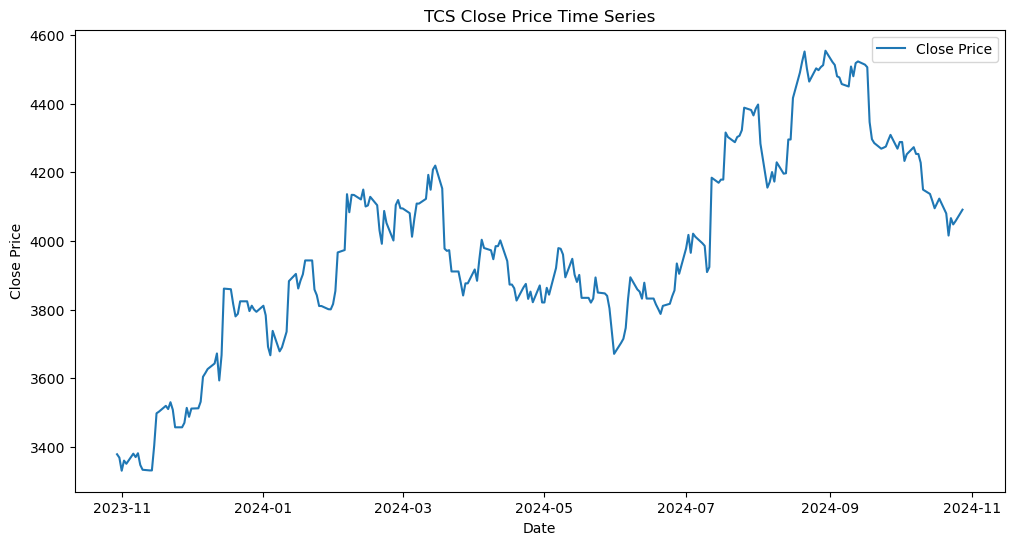

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Close Price')
plt.title('TCS Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


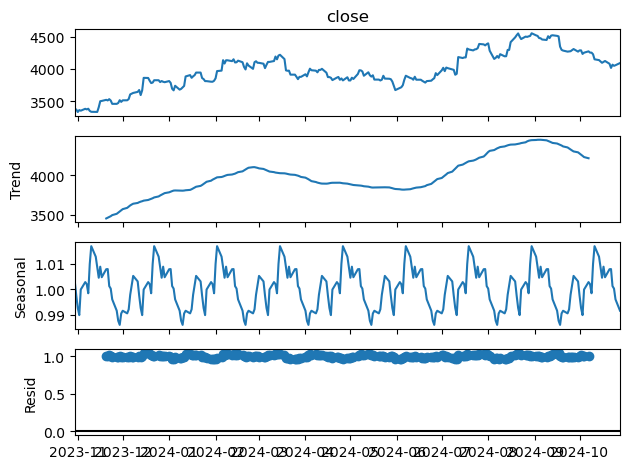

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['close'], model='multiplicative', period=30)
result.plot()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  261
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1382.107
Date:                Thu, 14 Nov 2024   AIC                           2776.214
Time:                        13:46:04   BIC                           2797.578
Sample:                    10-30-2023   HQIC                          2784.803
                         - 10-28-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0604      0.071      0.854      0.393      -0.078       0.199
ar.L2         -0.0521      0.061     -0.859      0.390      -0.171       0.067
ar.L3          0.0990      0.080      1.242      0.2

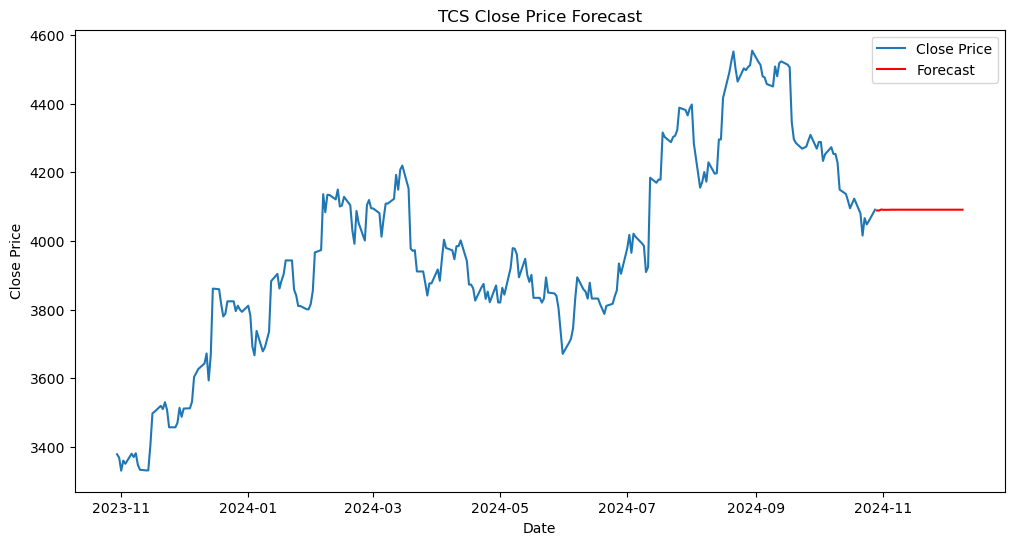

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['close'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Close Price')
plt.plot(forecast, label='Forecast', color='red')
plt.title('TCS Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
